# Classification - CNN

In [5]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

## Dataset

MNIST is a handwrriten digit database with a training set of 60,000 examples and a test se of 10,000 examples. The images are all 28x28 and greyscale.

It is available [here](http://yann.lecun.com/exdb/mnist/), but is included in Keras and will automatically download.

In [6]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Here, the 'x' arrays are the images and the 'y' arrays are the labels

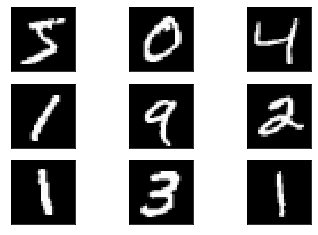

In [7]:
fig, axs = plt.subplots(3,3)
axs = axs.ravel()
for i in range(len(axs)):
    axs[i].imshow(x_train[i].reshape(28,28), cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

### General parameters

We need to define some general parameters for networks we're going to use

In [8]:
batch_size = 128    # number of images passed each iteration
num_classes = 10    # digits 0 to 9
epochs = 20         # number of full passes of the dataset

## CNN

This example uses a convolutiona neural net, in this case a 2D CNN

For a CNN the data needs to be parsed as 2D array, rather than a 1D array. 

So, the data is reshaped according to the number of samples (60,000 or 10,000) and the size of the image 28x28.

The data is then normalized (0,255) to (0,1)

In [9]:
# input image dimensions
img_rows, img_cols = 28, 28

In [10]:
# reshape data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


As is the content of the labels vectors looks like this:
```
array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)
```
The NN expects them labels as binary class matrix instead

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now the label for each image looks like this:
```
array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)
```


### The Model

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# input to dense layer needs to be 1D array
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = 0.01, momentum = 0.9, nesterov = True),
metrics=['accuracy'])

### The Training
This will be slow to run (~1-2 minutes per epoch) on a CPU

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 101s 2ms/step - loss: 0.5032 - acc: 0.8428 - val_loss: 0.1463 - val_acc: 0.9560
Epoch 2/20
60000/60000 [==============================] - 132s 2ms/step - loss: 0.1959 - acc: 0.9425 - val_loss: 0.0771 - val_acc: 0.9767
Epoch 3/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1278 - acc: 0.9618 - val_loss: 0.0530 - val_acc: 0.9826
Epoch 4/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1015 - acc: 0.9695 - val_loss: 0.0445 - val_acc: 0.9854
Epoch 5/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0829 - acc: 0.9748 - val_loss: 0.0428 - val_acc: 0.9849
Epoch 6/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0750 - acc: 0.9774 - val_loss: 0.0381 - val_acc: 0.9885
Epoch 7/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0653 - acc: 0.9796 - val_loss: 0.0352 - val_